In [ ]:
#CRIM - уровень преступности на душу населения по городам
#ZN — доля жилых земель, отнесенных к участкам площадью более 25 000 кв. футов.
#ИНДУС — доля неторговой коммерческой площади в акрах на город.
#CHAS — фиктивная переменная реки Чарльз (1, если участок граничит с рекой; 0 в противном случае)
#NOX - концентрация оксидов азота (частей на 10 миллионов)
#RM - среднее количество комнат в жилище
#ВОЗРАСТ — доля жилых единиц, построенных до 1940 года и занимаемых владельцами.
#DIS — взвешенные расстояния до пяти бостонских центров занятости
#RAD - индекс доступности к радиальным магистралям
#tax - ставка налога на имущество в размере полной стоимости за 10 000 долларов США
#PTRATIO — соотношение учеников и учителей по городам
#B - 1000(Bk - 0,63)^2, где Bk — доля чернокожих в городе.
#LSTAT - % более низкого статуса населения
#MEDV — медианная стоимость домов, занимаемых владельцами, в тысячах долларов США

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [231]:
df = pd.read_csv('C:/Users/Pavel/Lessen_jypyter/BostonHousing.csv')
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [287]:
df[df.duplicated(keep = 'first')]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_group


In [293]:
df_drop_null = df2.dropna()
df_drop_null.isna().sum()                      #удаление пропусков и создании копии таблицы 
df_drop_null             

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [323]:
df_drop_null.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

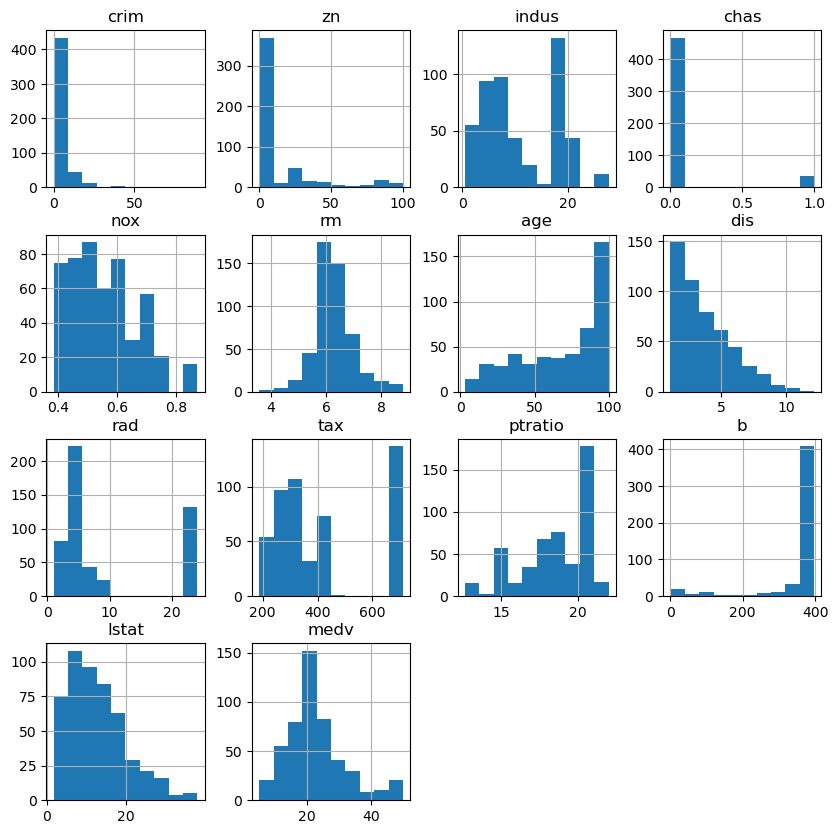

In [294]:
df_drop_null.hist(figsize=(10,10))
plt.show()

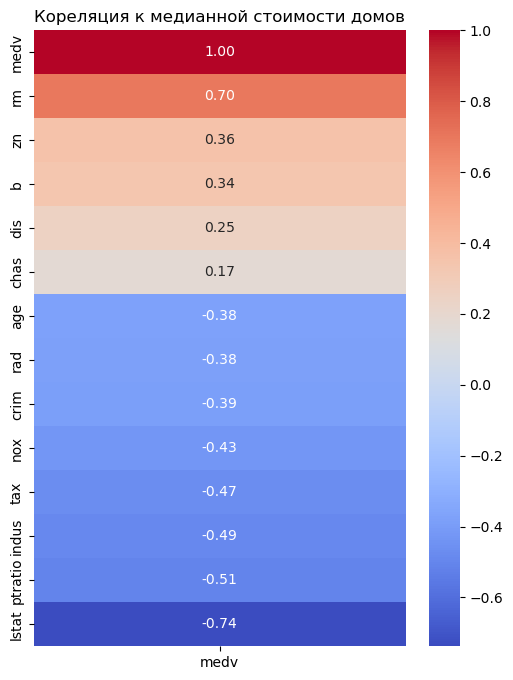

In [309]:
corr_tabl = df_drop_null.corr(numeric_only=True)
medv_corr = corr_tabl[['medv']].sort_values(by = 'medv',ascending = False)
plt.figure(figsize= (6,8))
sns.heatmap(medv_corr,annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title('Кореляция к медианной стоимости домов')
plt.show()
                                                             # Показывает по убиыванию кореляцию столбцов по отношению к medv(Медианной стоимости дома)

In [327]:
df_drop_null['lstat'].sort_values()


161     1.73
162     1.92
40      1.98
232     2.47
192     2.87
       ...  
412    34.37
141    34.41
373    34.77
414    36.98
374    37.97
Name: lstat, Length: 501, dtype: float64

In [338]:
df_drop_null.iloc[157]

crim         1.83377
zn           0.00000
indus       19.58000
chas         1.00000
nox          0.60500
rm           7.80200
age         98.20000
dis          2.04070
rad          5.00000
tax        403.00000
ptratio     14.70000
b          389.61000
lstat        1.92000
medv        50.00000
Name: 162, dtype: float64

In [339]:
df_drop_null.iloc[369]

crim        18.4982
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6680
rm           4.1380
age        100.0000
dis          1.1370
rad         24.0000
tax        666.0000
ptratio     20.2000
b          396.9000
lstat       37.9700
medv        13.8000
Name: 374, dtype: float64

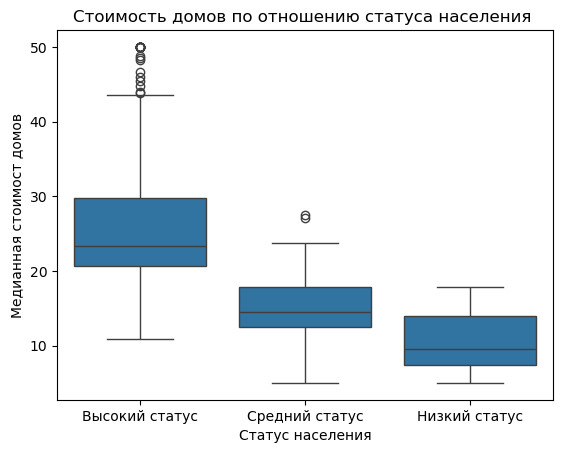

In [348]:
df_up = df_drop_null
df_up['lstat_group'] = pd.cut(df_up['lstat'], bins = [0,15,30,40], labels = ['Высокий статус', 'Средний статус','Низкий статус'])
sns.boxplot(df_up, x = 'lstat_group', y = 'medv')
plt.title('Стоимость домов по отношению статуса населения ')
plt.xlabel('Статус населения')
plt.ylabel('Медианная стоимост домов')
plt.show()

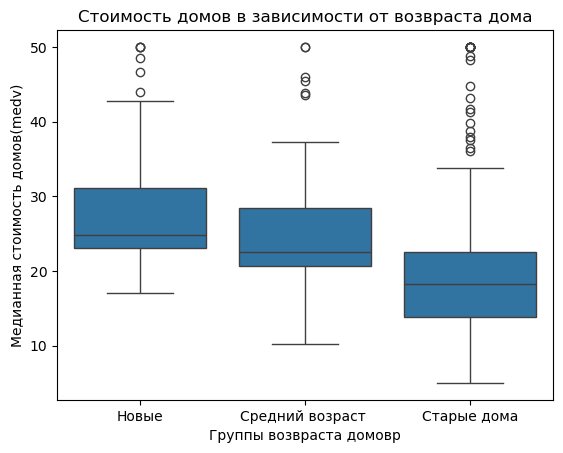

In [356]:
df_up['age_group'] = pd.cut(df_up['age'], bins=[0, 35, 70, 100], labels=['Новые', 'Средний возраст ', 'Старые дома'])

sns.boxplot(data=df_up, x='age_group', y='medv')
plt.title('Стоимость домов в зависимости от возвраста дома')
plt.xlabel('Группы возвраста домовр')
plt.ylabel('Медианная стоимость домов(medv)')
plt.show()

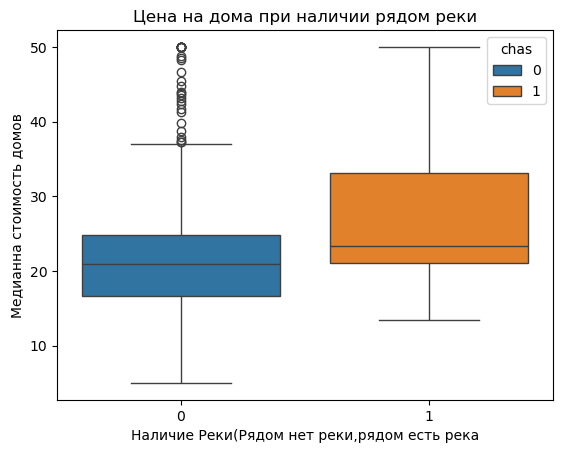

In [361]:
sns.boxplot(data=df_up, x="chas", y="medv", hue = 'chas')
plt.title('Цена на дома при наличии рядом реки')
plt.xlabel('Наличие Реки(Рядом нет реки,рядом есть река')
plt.ylabel('Медианна стоимость домов')
plt.show()

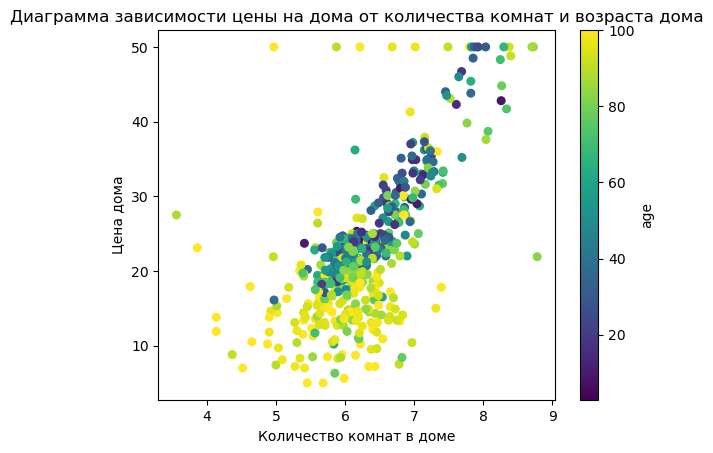

In [349]:
df_up.plot.scatter(x = 'rm', y = 'medv', c = 'age', s = 30)
plt.title('Диаграмма зависимости цены на дома от количества комнат и возраста дома')
plt.xlabel('Количество комнат в доме')
plt.ylabel('Цена дома')
plt.show()

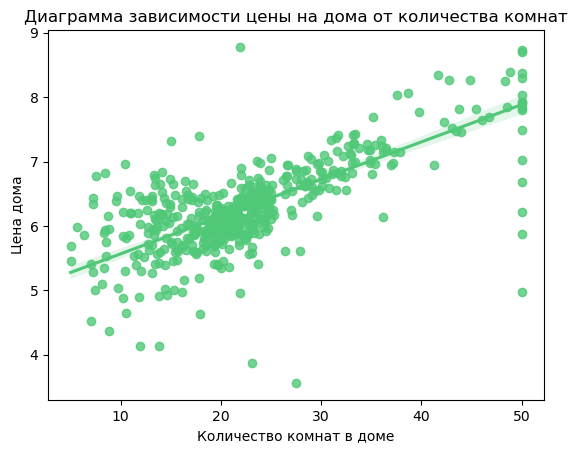

In [363]:
sns.regplot(data=df_up, x="medv", y="rm", robust=True, color = '#50c878')
plt.title('Диаграмма зависимости цены на дома от количества комнат')
plt.xlabel('Количество комнат в доме')
plt.ylabel('Цена дома')
plt.show()